In [ ]:
import torch
dim = 8
seq_len = 100
theta = 10000

freqs = 1.0 / (theta ** (torch.arange(0, dim, 2)[: (dim // 2)].float() / dim))
# 生成 token 序列索引 t = [0, 1,..., seq_len-1]
t = torch.arange(seq_len, device=freqs.device)
# freqs.shape = [seq_len, dim // 2] 
freqs = torch.outer(t, freqs).float()  # 计算m * \theta input 和 vec2 的外积。如果 input 是大小为 n 的向量，而 vec2 是大小为 m 的向量，则 out 必须是大小为 (n×m) 的矩阵。不可广播

# 计算结果是个复数向量
# 假设 freqs = [x, y]
# 则 freqs_cis = [cos(x) + sin(x)i, cos(y) + sin(y)i]
freqs_cis = torch.polar(torch.ones_like(freqs), freqs) # 极坐标

In [ ]:
print(-1e-9)

In [ ]:
m = 3
n = 5
dp = [[1] * n] + [[1] + [0] * (n - 1) for _ in range(m-1)]
print(dp)


In [ ]:
import torch.distributed as dist
import os

dist.init_process_group(backend='nccl', rank=0)
print(dist.get_rank())

In [ ]:
import torch
w_values = [
        [0.2, 0.9, 0.7, 0.7],
        [0.5, 0.2, 0.6, 0.0],
        [0.1, 0.2, 0.8, 0.8],
        [0.3, 0.5, 0.8, 1.0],
        [0.7, 0.6, 0.8, 0.2],
        [0.6, 0.1, 0.2, 0.2],
        [0.7, 0.7, 0.2, 0.7],
        [0.8, 0.4, 0.5, 0.6],
        [0.8, 1.0, 0.1, 0.3],
        [0.7, 0.9, 0.9, 0.9],
    ]
w = torch.tensor(w_values, requires_grad=True)

print(w.shape)

sub_w = torch.split(w, [2, 2], dim=1)

print(sub_w)


In [ ]:
x = torch.rand(4, 6)
print(x)

In [ ]:
import datasets
dataset = datasets.load_dataset("tatoeba", lang1="en", lang2="he")
print(dataset)

In [ ]:
import torch
'''
mask的作用主要是将mask为true的地方变为负无穷,不影响后续softmax的计算
'''
weight = torch.rand((10,20,30))
mask = torch.ones_like(weight, dtype=torch.bool).triu(1) # 上三角
weight.masked_fill_(mask, -torch.inf)

print(weight)
print(mask)
print(weight)

(300, 183)


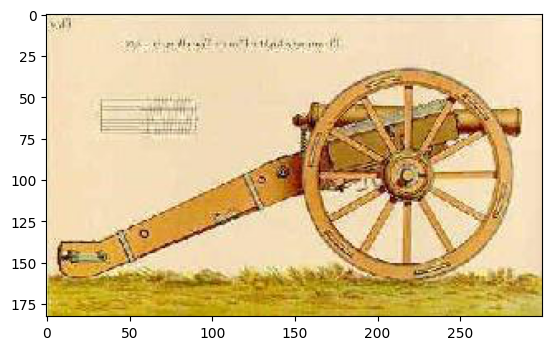

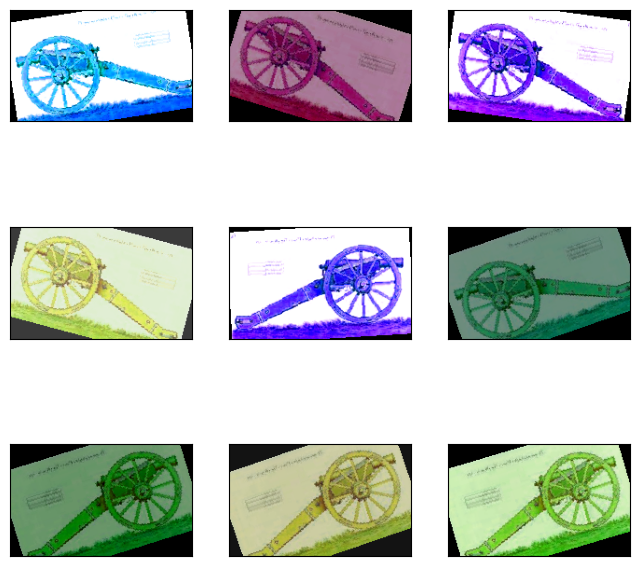

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from torchvision import transforms

im_aug = transforms.Compose([
    transforms.Resize(120),
    transforms.RandomHorizontalFlip(),
    # transforms.RandomCrop(120), # 随机裁剪有风险
    transforms.RandomRotation(20), # 随机旋转
    transforms.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])


im = Image.open('./data/image_0001.jpg')
print(im.size)
plt.imshow(im)

nrows = 3
ncols = 3
figsize = (8,8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)

for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()


(196, 120)
(196, 120)


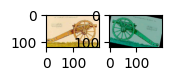

In [3]:
# 同时显示多张图片
im1 = transforms.Resize(120)(im)
im2 = im_aug(im)

print(im1.size)
print(im2.size)

# position = (0,0)

# im2.paste(im1, position)
# plt.imshow(im2)

for i in range(1,3):
    plt.subplot(4,8,i)
    if i == 1:
        plt.imshow(im1)
    else:
        plt.imshow(im2)

plt.show()

(196, 120)
(196, 120)


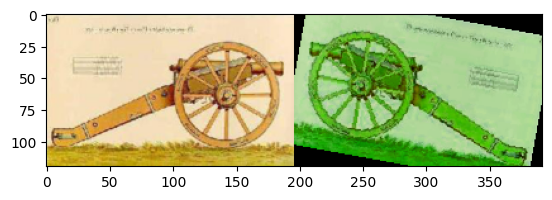

In [17]:
# Image 拼接图片
from MoCo import GaussianBlur

IMAGES_PATH = './data/image'  # 图片集地址
IMAGES_FORMAT = ['.jpg', '.JPG']  # 图片格式
IMAGE_SIZE_COLUMN = 196  # 每张小图片的大小
IMAGE_SIZE_ROW = 120
IMAGE_ROW = 1  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 2  # 图片间隔，也就是合并成一张图后，一共有几列
IMAGE_SAVE_PATH = './data/image/final.jpg'  # 图片转换后的地址

moco_aug1 = transforms.Compose([
    transforms.RandomResizedCrop(120, scale=(0.2, 1.0)),
    transforms.RandomApply(
                [transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8  # not strengthened
            ),
    transforms.RandomGrayscale(p=0.2),
    # transforms.RandomApply([GaussianBlur([0.1, 2.0])], p=0.5),
    transforms.RandomHorizontalFlip(),
    # transforms.ToTensor(), # 如果是输入到模型中，则需要后两行的内容，不输入模型的话，就不需要totensor()
    # normalize,
])


im1 = transforms.Resize(120)(im)
im2 = im_aug(im)

print(im1.size)
print(im2.size)

l = [im1,im2]

to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE_COLUMN, IMAGE_ROW * IMAGE_SIZE_ROW))
for y in range(1, IMAGE_ROW + 1):
    for x in range(1, IMAGE_COLUMN + 1):
        to_image.paste(l[x-1], ((x - 1) * IMAGE_SIZE_COLUMN, (y - 1) * IMAGE_SIZE_ROW))

plt.imshow(to_image)
# to_image.save('./data/final.jpg')
